# AdaBoost – Ensemble Methods for Uber Fare Classification

## Algorithm Description

This directory implements the **AdaBoost (Adaptive Boosting)** classification algorithm using a custom implementation from the `rice_ml` package:

```python
from rice_ml.boosting import AdaBoost
```

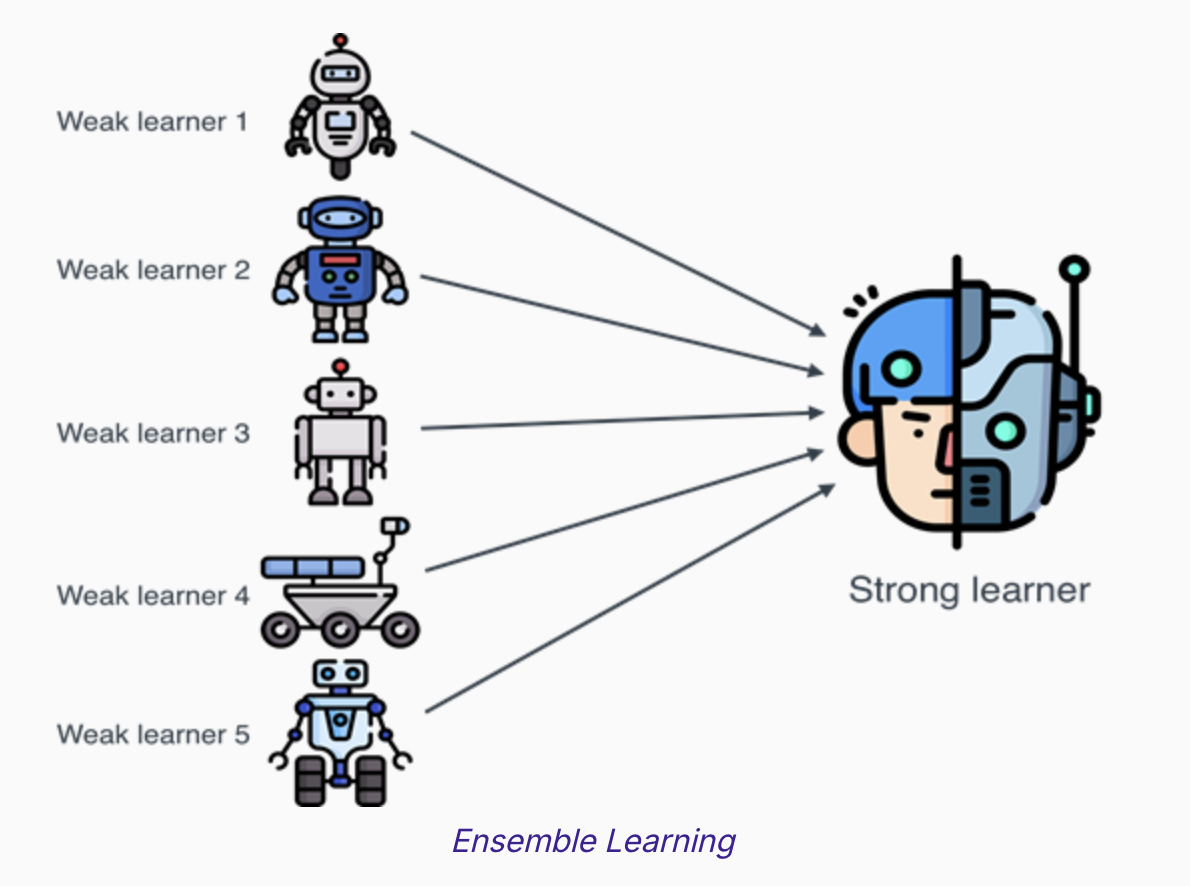

AdaBoost is an **ensemble learning** method that combines multiple **weak learners** (typically shallow decision trees or "decision stumps") into a single strong classifier. Each weak learner is trained in sequence, with more focus on previously misclassified examples. The final prediction is a weighted vote across all learners.

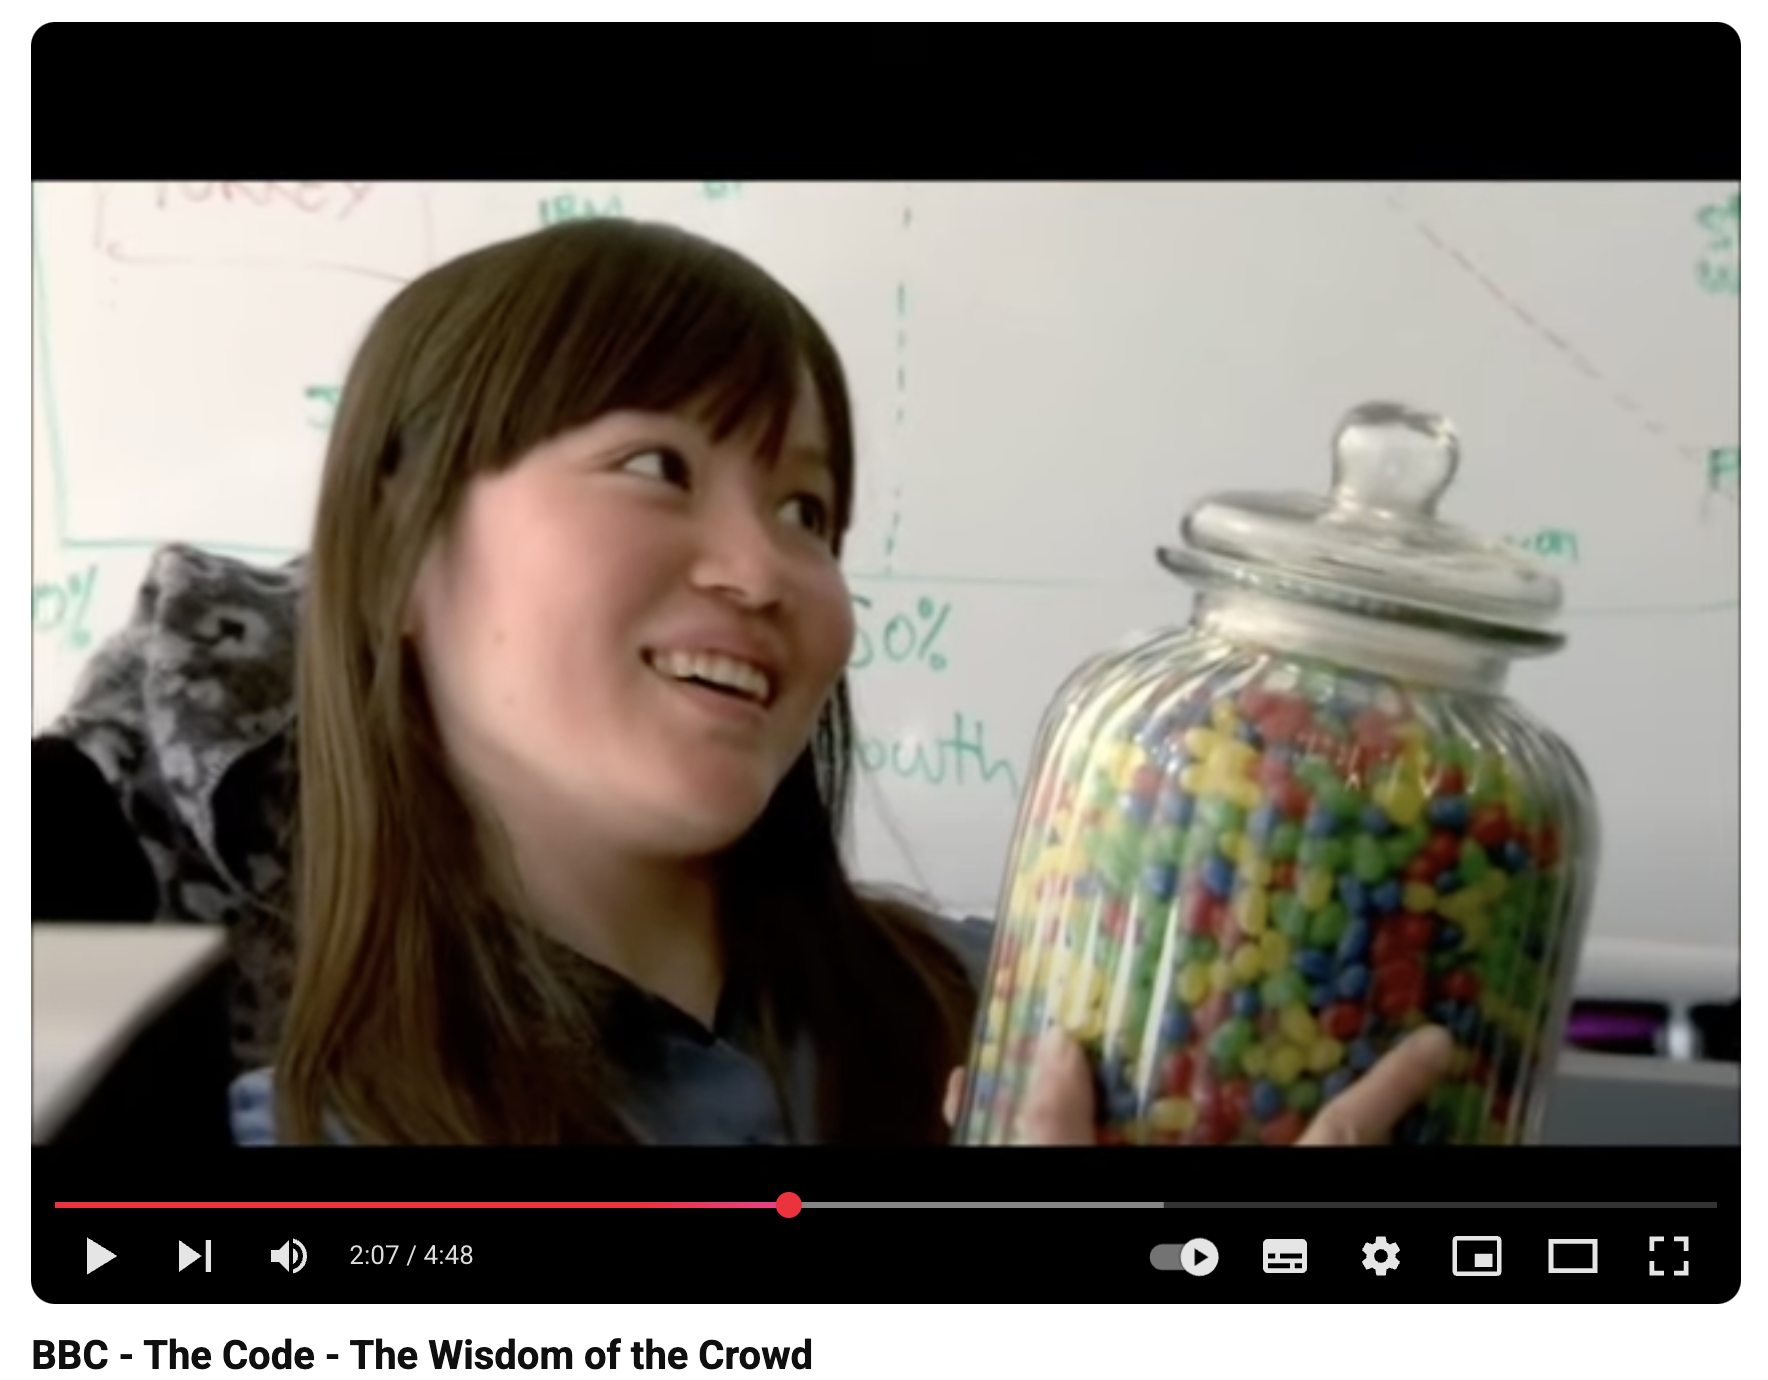

In class, our professor introduced this concept using the famous **"Wisdom of the Crowd"** example. We watched a BBC video clip in which many people guessed how many jelly beans were inside a jar. Surprisingly, the **average of all guesses** was remarkably close to the true number of beans—much closer than most individual guesses. This example beautifully demonstrates the core intuition behind ensemble learning: **aggregated judgments often outperform individual ones**.

> Each weak model may only be slightly better than random guessing, but when combined intelligently, they form a robust and accurate ensemble model.

Cloning into 'INDE577_ML_Rice_2025'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (329/329), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 329 (delta 163), reused 171 (delta 70), pack-reused 0 (from 0)
Receiving objects: 100% (329/329), 11.65 MiB | 18.10 MiB/s, done.
Resolving deltas: 100% (163/163), done.
Mounted at /content/drive


<ipython-input-2-858871ba5a98>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = (df['fare_amount'] > 15).astype(int)


=== AdaBoost Classification ===
Accuracy:  0.9290
Precision: 0.8794
Recall:    0.6966


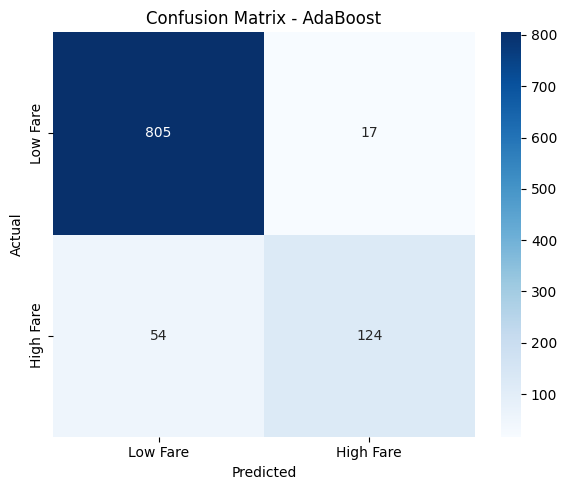

In [2]:
# Step 1: Clone GitHub repo and import AdaBoost model
!rm -rf INDE577_ML_Rice_2025
!git clone https://github.com/alicewang777/INDE577_ML_Rice_2025.git

import sys
sys.path.append('/content/INDE577_ML_Rice_2025')

from rice_ml.boosting import AdaBoost
from rice_ml.metrics import accuracy

# Step 2: Mount Google Drive and load dataset
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Step 3: Load and preprocess Uber fare data
csv_path = "/content/drive/MyDrive/Colab Notebooks/ML_Rice_2025_Final_Project/uber.csv"
df = pd.read_csv(csv_path)

# Filter invalid coordinates and outliers
df = df[(df['pickup_longitude'] != 0) & (df['dropoff_longitude'] != 0)]
df = df[df['fare_amount'] < 100]
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df = df.dropna()

# Create binary label: 1 if fare > 15, else 0
df['label'] = (df['fare_amount'] > 15).astype(int)

# Sample 5000 rows to reduce computation
df = df.sample(n=5000, random_state=42)

# Feature engineering
df['minute'] = df['pickup_datetime'].dt.minute
df['hour_exact'] = df['pickup_datetime'].dt.hour + df['minute'] / 60.0
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
df['hour_exact_x_passenger'] = df['hour_exact'] * df['passenger_count']
df['manhattan_distance'] = (
    np.abs(df['pickup_longitude'] - df['dropoff_longitude']) +
    np.abs(df['pickup_latitude'] - df['dropoff_latitude'])
)

features = [
    'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
    'passenger_count', 'hour_exact', 'dayofweek', 'is_weekend',
    'hour_exact_x_passenger', 'manhattan_distance'
]

X = df[features].values
y = df['label'].values

# Step 4: Normalize features and split data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train AdaBoost model
ab_model = AdaBoost(n_estimators=20)
ab_model.fit(X_train, y_train)
y_pred = ab_model.predict(X_test)

# Step 6: Evaluate model
acc = accuracy(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)

print("=== AdaBoost Classification ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")

# Step 7: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Fare", "High Fare"], yticklabels=["Low Fare", "High Fare"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.tight_layout()
plt.show()


## Model Performance Interpretation – AdaBoost

The AdaBoost classifier achieved strong performance on the Uber fare classification task.

- **Accuracy**: 92.90%  
  This indicates that nearly 93% of all ride classifications (high fare vs. low fare) were correct.

- **Precision**: 87.94%  
  This means that when the model predicts a ride to be high fare, it is correct about 88% of the time—implying a relatively low false positive rate.

- **Recall**: 69.66%  
  The model successfully identified nearly 70% of all actual high-fare rides. While not perfect, this recall is reasonable for many real-world applications where false negatives are tolerable.

### Confusion Matrix Insights

- **True Negatives (805)**: Most low-fare rides were correctly classified.
- **True Positives (124)**: A large number of high-fare rides were accurately predicted.
- **False Negatives (54)**: These high-fare rides were incorrectly labeled as low fare.
- **False Positives (17)**: A small portion of low-fare rides were misclassified as high fare.

### Overall Assessment

AdaBoost, using an ensemble of shallow decision trees (stumps), effectively captured the non-linear patterns in the Uber dataset. Compared to a single decision tree, this boosted model reduces bias and variance by reweighting the misclassified examples. The relatively high precision and accuracy suggest the model generalizes well to unseen data, with balanced tradeoffs between capturing high-fare instances and minimizing misclassifications.
